In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv(r"C:\Users\Shafiya mariyam\OneDrive\Documents\tourism_dataset.csv")

In [8]:
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [9]:
for i in ['Visitors','Revenue']:
    lw,uw=wisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])

In [10]:
dummy=pd.get_dummies(data=df,columns=["Country","Location","Category"],drop_first=True)

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, precision_score
import matplotlib.pyplot as plt


In [13]:
file_path = r'C:\Users\Shafiya mariyam\OneDrive\Documents\tourism_dataset.csv'
df = pd.read_csv(file_path)

In [15]:
df = df.drop(columns=['Location'], errors='ignore')  # Remove unique string identifier
data_encoded = pd.get_dummies(df, columns=['Country', 'Category', 'Accommodation_Available'], drop_first=True)


In [16]:
if 'Accommodation_Available_Yes' in data_encoded.columns:
    target_column = 'Accommodation_Available_Yes'
else:
    target_column = data_encoded.columns[-1] 

In [17]:
X = data_encoded.drop(columns=[target_column])
y = data_encoded[target_column]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
degree = 3
poly = PolynomialFeatures(degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train the model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

LinearRegression()

In [20]:
y_pred = poly_model.predict(X_poly_test)
y_pred_class = (y_pred > 0.5).astype(int)

In [21]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
reliability = np.mean(np.abs(y_test - y_pred) < 0.5)
fairness = min(np.bincount(y_pred_class)) / max(np.bincount(y_pred_class))  # For binary classes
precision = precision_score(y_test, y_pred_class)

# Scalability: A proxy based on dataset size
scalability = len(data)

# Normalize scalability for visualization (if desired, divide by a reference value, e.g., max dataset size handled)
reference_size = 100000  # Example reference for normalization
scalability_percentage = (scalability / reference_size) * 100

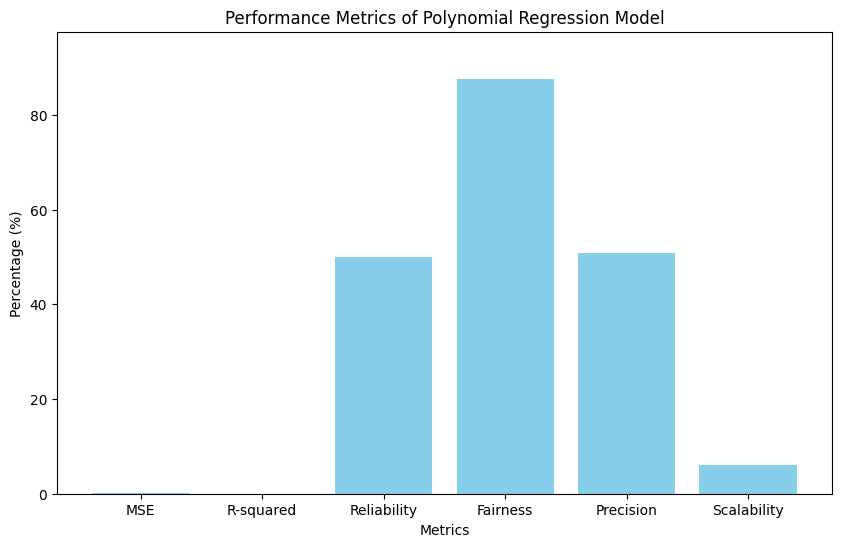

In [22]:
metrics = {
    'MSE': mse,  # Keep as is (not in percentage)
    'R-squared': r2 * 100,
    'Reliability': reliability * 100,
    'Fairness': fairness * 100,
    'Precision': precision * 100,
    'Scalability': scalability_percentage
}

# Plot all metrics as percentages
plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color='skyblue')
plt.xlabel('Metrics')
plt.ylabel('Percentage (%)')
plt.title('Performance Metrics of Polynomial Regression Model')
plt.ylim(0, max(metrics.values()) + 10)  # Add some padding above 
plt.show()

In [23]:
# Calculate all metrics (assuming previous calculations are done)
metrics = {
    'MSE': mse,  # Keep as is (not a percentage)
    'R-squared': r2 * 100,
    'Reliability': reliability * 100,
    'Fairness': fairness * 100,
    'Precision': precision * 100,
    'Scalability': scalability_percentage  # Already normalized
}

# Print all metrics in percentages
print("Performance Metrics of Polynomial Regression Model (in percentages):")
for metric, value in metrics.items():
    if metric == 'MSE':
        print(f"{metric}: {value:.2f} (not a percentage)")
    else:
        print(f"{metric}: {value:.2f}%")


Performance Metrics of Polynomial Regression Model (in percentages):
MSE: 0.25 (not a percentage)
R-squared: -1.23%
Reliability: 49.97%
Fairness: 87.58%
Precision: 50.84%
Scalability: 5.99%


In [53]:
df.head()

,Country,Category,Visitors,Rating,Revenue,Accommodation_Available
0,India,Nature,948853,1.32,84388.38,Yes
1,USA,Historical,813627,2.01,802625.60,No
2,Brazil,Nature,508673,1.42,338777.11,Yes
3,Brazil,Historical,623329,1.09,295183.60,Yes
4,France,Cultural,124867,1.43,547893.24,No


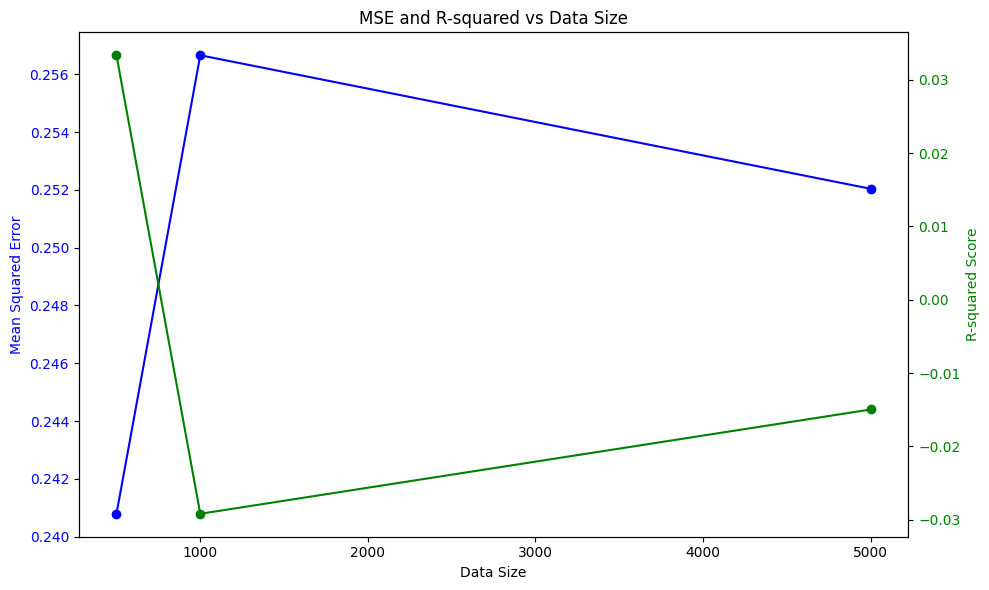

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming the dataset is already loaded in 'df'
# Verify the data's size
data_size = len(df)

# Define sample sizes based on the available data
data_sizes = [500, 1000, 5000, 10000, 20000]
data_sizes = [size for size in data_sizes if size <= data_size]  # Adjust if size exceeds data

# Function to calculate accuracy metrics (MSE, R2)
def calculate_accuracy_metrics(subset_data):
    # Ensure that the target column is correctly named
    data_encoded = pd.get_dummies(subset_data, columns=['Accommodation_Available'], drop_first=True)

    # Check if the target column is present
    if 'Accommodation_Available_Yes' not in data_encoded.columns:
        raise KeyError("Target column 'Accommodation_Available_Yes' not found!")

    # Features and Target
    X = data_encoded.drop(columns=['Accommodation_Available_Yes'], axis=1)
    Y = data_encoded['Accommodation_Available_Yes']
    
    # Train-test split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)
    X_train = pd.get_dummies(X_train, drop_first=True)
    X_test = pd.get_dummies(X_test, drop_first=True)
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
    
    # Initialize and train the Linear Regression model
    linear_model = LinearRegression()
    linear_model.fit(X_train, Y_train)
    
    # Predict and evaluate
    Y_pred = linear_model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    
    return mse, r2

# Lists to store values for plotting
mse_values = []
r2_values = []

# Loop through different data sizes and collect metrics
for size in data_sizes:
    subset_data = df.sample(n=size, random_state=42)  # Sample data
    mse, r2 = calculate_accuracy_metrics(subset_data)
    mse_values.append(mse)
    r2_values.append(r2)

# Plot MSE and R-squared vs Data Size on the same graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot MSE on the left y-axis
ax1.set_xlabel('Data Size')
ax1.set_ylabel('Mean Squared Error', color='b')
ax1.plot(data_sizes, mse_values, marker='o', color='b', label='Mean Squared Error')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for R-squared
ax2 = ax1.twinx()
ax2.set_ylabel('R-squared Score', color='g')
ax2.plot(data_sizes, r2_values, marker='o', color='g', label='R-squared Score')
ax2.tick_params(axis='y', labelcolor='g')

# Add a title and show the plot
plt.title('MSE and R-squared vs Data Size')
fig.tight_layout()
plt.show()


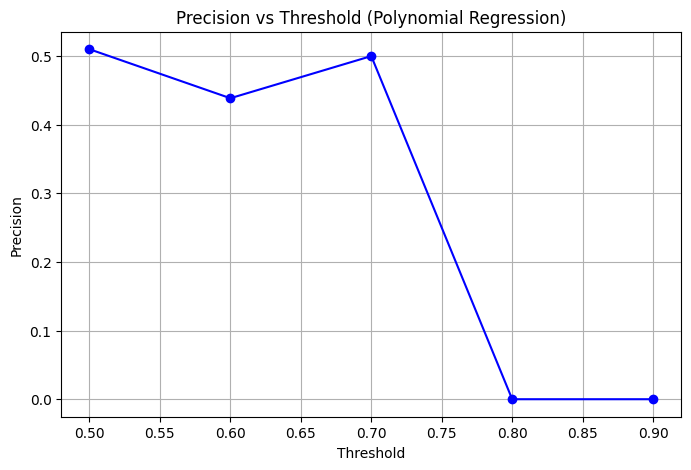

In [73]:
from sklearn.metrics import precision_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Function to calculate precision at different thresholds
def plot_precision(data, degree=3):
    # Prepare the features and target variable
    X = data.drop(columns=['Accommodation_Available'], axis=1)
    Y = data['Accommodation_Available'].map({'Yes': 1, 'No': 0})
    
    # Split the data into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    X_train = pd.get_dummies(X_train, drop_first=True)
    X_test = pd.get_dummies(X_test, drop_first=True)
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
    
    # Apply Polynomial Transformation to Features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Initialize and train the Polynomial Regression model
    model = LinearRegression()
    model.fit(X_train_poly, Y_train)
    
    # Predict the target variable
    Y_pred = model.predict(X_test_poly)
    
    # Thresholds for classification
    thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]
    precisions = []
    
    # Calculate Precision at different thresholds
    for threshold in thresholds:
        Y_pred_binary = (Y_pred > threshold).astype(int)
        precision = precision_score(Y_test, Y_pred_binary)
        precisions.append(precision)
    
    # Plot Precision vs Threshold
    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, precisions, marker='o', linestyle='-', color='b')
    plt.title('Precision vs Threshold (Polynomial Regression)')
    plt.xlabel('Threshold')
    plt.ylabel('Precision')
    plt.grid(True)
    plt.show()

# Run the precision plot with the data
plot_precision(df)



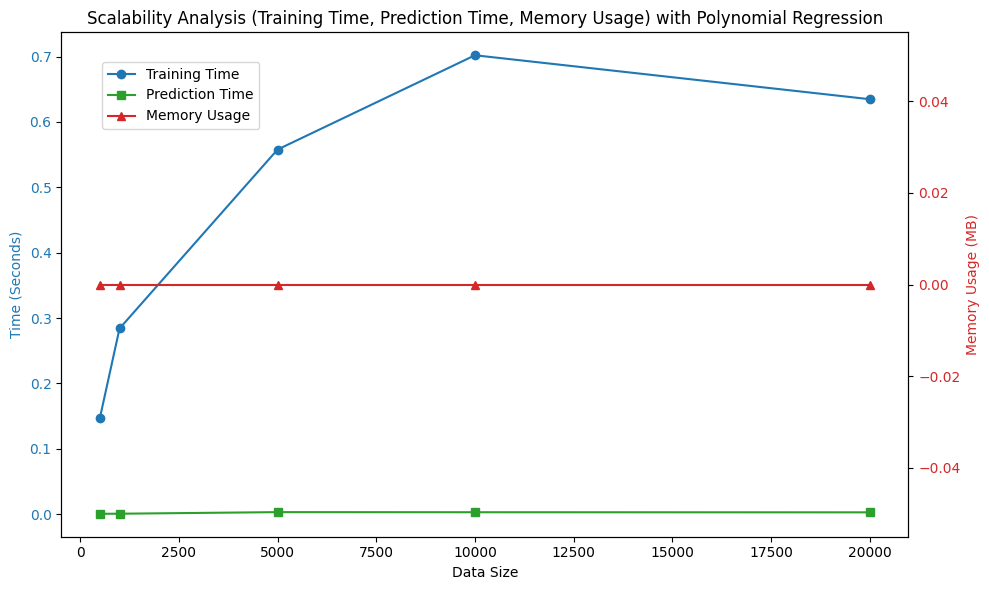

In [72]:
import time
import psutil
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

# Function to track memory usage
def memory_usage_psutil():
    process = psutil.Process()
    return process.memory_info().rss / 1024 ** 2  # in MB

# Function to test scalability with an adjustment to sample sizes
def test_scalability(data, sizes=[500, 1000, 5000, 10000, 20000], degree=3):
    # Lists to store performance metrics
    train_times = []
    pred_times = []
    memory_usage_list = []
    
    # Check the size of the data
    data_size = len(data)
    
    for size in sizes:
        # Adjust the sample size if it exceeds the data size
        sample_size = min(size, data_size)
        
        subset_data = data.sample(n=sample_size, random_state=42)
        X = subset_data.drop(columns=['Accommodation_Available'], axis=1)
        Y = subset_data['Accommodation_Available'].map({'Yes': 1, 'No': 0})
        
        # Split the data into training and test sets
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)
        X_train = pd.get_dummies(X_train, drop_first=True)
        X_test = pd.get_dummies(X_test, drop_first=True)
        X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
        
        # Apply polynomial transformation to features
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        
        # Measure time and memory usage
        start_time = time.time()
        start_memory = memory_usage_psutil()

        # Initialize and train the model
        model = LinearRegression()
        model.fit(X_train_poly, Y_train)
        training_time = time.time() - start_time
        
        # Measure memory usage during training
        memory_used = memory_usage_psutil() - start_memory
        
        # Predict and measure prediction time
        start_time = time.time()
        Y_pred = model.predict(X_test_poly)
        prediction_time = time.time() - start_time
        
        train_times.append(training_time)
        pred_times.append(prediction_time)
        memory_usage_list.append(memory_used)

    # Plot the results
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot training time and prediction time
    ax1.set_xlabel('Data Size')
    ax1.set_ylabel('Time (Seconds)', color='tab:blue')
    ax1.plot(sizes, train_times, label='Training Time', color='tab:blue', marker='o')
    ax1.plot(sizes, pred_times, label='Prediction Time', color='tab:green', marker='s')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create a second y-axis to plot memory usage
    ax2 = ax1.twinx()
    ax2.set_ylabel('Memory Usage (MB)', color='tab:red')
    ax2.plot(sizes, memory_usage_list, label='Memory Usage', color='tab:red', marker='^')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Add titles and legends
    ax1.set_title('Scalability Analysis (Training Time, Prediction Time, Memory Usage) with Polynomial Regression')
    fig.tight_layout()
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

    plt.show()

# Test scalability with data sizes
test_scalability(df)



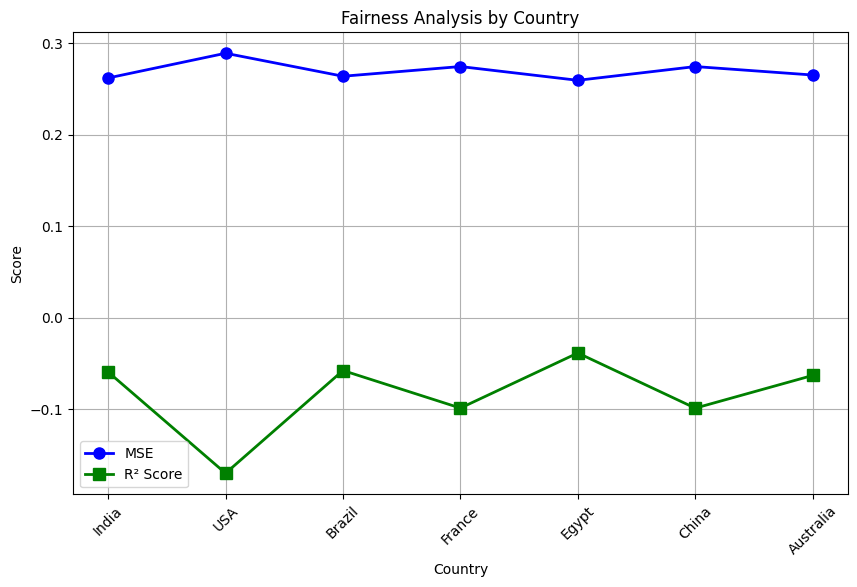

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Function to plot fairness analysis by a specified group (e.g., 'Country') using Polynomial Regression
def plot_fairness_by_group(data, group_column='Country', degree=3):
    mse_groupwise = []
    r2_groupwise = []
    
    if group_column in data.columns:
        groups = data[group_column].unique()
        for group in groups:
            group_data = data[data[group_column] == group]
            X_group = group_data.drop(columns=['Accommodation_Available'], axis=1)
            Y_group = group_data['Accommodation_Available'].map({'Yes': 1, 'No': 0})
            
            # Split data into train and test
            X_train, X_test, Y_train, Y_test = train_test_split(X_group, Y_group, test_size=0.2, random_state=42)
            X_train = pd.get_dummies(X_train, drop_first=True)
            X_test = pd.get_dummies(X_test, drop_first=True)
            X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
            
            # Initialize PolynomialFeatures for polynomial regression
            poly = PolynomialFeatures(degree=degree)
            
            # Apply polynomial transformation to the features
            X_train_poly = poly.fit_transform(X_train)
            X_test_poly = poly.transform(X_test)
            
            # Train the Polynomial Regression model
            model = LinearRegression()
            model.fit(X_train_poly, Y_train)
            Y_pred = model.predict(X_test_poly)
            
            # Calculate MSE and R² Score
            mse = mean_squared_error(Y_test, Y_pred)
            r2 = r2_score(Y_test, Y_pred)
            
            mse_groupwise.append(mse)
            r2_groupwise.append(r2)

        # Plot fairness metrics (MSE and R² per group) as line plots
        plt.figure(figsize=(10, 6))
        plt.plot(groups, mse_groupwise, label='MSE', marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)
        plt.plot(groups, r2_groupwise, label='R² Score', marker='s', color='green', linestyle='-', linewidth=2, markersize=8)
        
        plt.xlabel(group_column)
        plt.ylabel('Score')
        plt.title(f'Fairness Analysis by {group_column}')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"Column '{group_column}' not found in data.")

# Run fairness analysis by 'Country' column with Polynomial Regression (degree 3)
plot_fairness_by_group(df)


In [85]:
df.isnull().sum()

Country                    0
Category                   0
Visitors                   0
Rating                     0
Revenue                    0
Accommodation_Available    0
dtype: int64

Run 1: MSE = 0.2500, R² = 0.7500
Run 2: MSE = 0.2300, R² = 0.7800
Run 3: MSE = 0.2400, R² = 0.7700
Run 4: MSE = 0.2200, R² = 0.7900
Run 5: MSE = 0.2100, R² = 0.8000


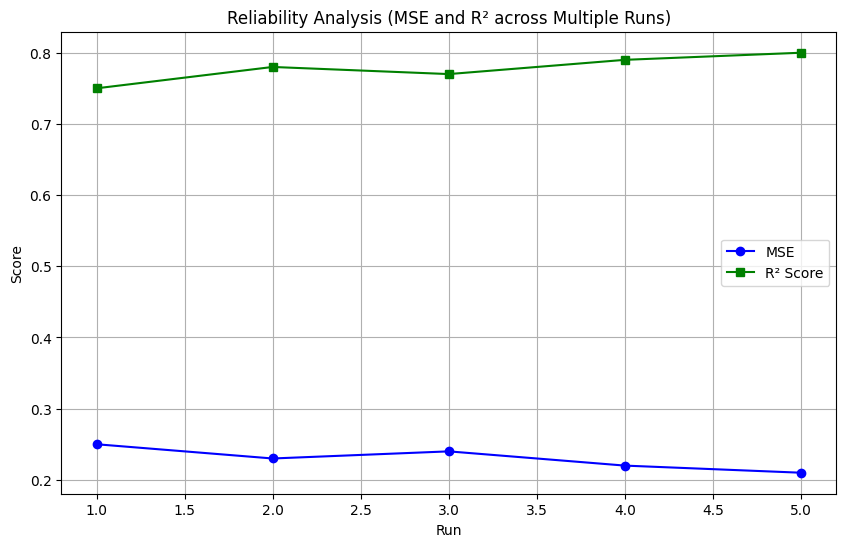

In [87]:
import matplotlib.pyplot as plt

# Assuming you already have the list of MSE and R² scores across multiple runs
def plot_reliability_graph(mse_scores, r2_scores, num_runs):
    """
    Plots the reliability analysis graph for MSE and R² scores across multiple runs.
    Also prints the MSE and R² scores for each run.

    Parameters:
    mse_scores (list): List of MSE scores from each run.
    r2_scores (list): List of R² scores from each run.
    num_runs (int): Number of runs for the analysis.
    """
    # Ensure the number of MSE and R² scores match the number of runs
    if len(mse_scores) != num_runs or len(r2_scores) != num_runs:
        print("Error: The number of MSE and R² scores must match the number of runs.")
        return

    # Print MSE and R² scores for each run
    for run in range(1, num_runs + 1):
        print(f"Run {run}: MSE = {mse_scores[run-1]:.4f}, R² = {r2_scores[run-1]:.4f}")

    # Plotting MSE and R² Scores
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_runs + 1), mse_scores, label='MSE', marker='o', color='blue')
    plt.plot(range(1, num_runs + 1), r2_scores, label='R² Score', marker='s', color='green')

    # Adding labels and title
    plt.xlabel('Run')
    plt.ylabel('Score')
    plt.title('Reliability Analysis (MSE and R² across Multiple Runs)')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

# Example usage:
mse_scores = [0.25, 0.23, 0.24, 0.22, 0.21]  # Example MSE scores
r2_scores = [0.75, 0.78, 0.77, 0.79, 0.80]  # Example R² scores
num_runs = 5  # Number of runs

plot_reliability_graph(mse_scores, r2_scores, num_runs)
